## Big Data Analytics - Final Project Implementation
- Done by: Abhijith Nagarajan, 121003005
- Topic: Implementing Ensemble techniques - Housing Price Regression

In [1]:
# Importing the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df = pd.read_csv("train.csv")

**<h2>Exploring the dataset</h2>**

In [3]:
house_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**<h2>Depicting the missing data</h2>**

In [6]:
missing_data = house_df.isnull().sum().sort_values(ascending=False)
percent_missing = (missing_data/house_df.isnull().count().sort_values(ascending=False))*100
total_missing = pd.concat([missing_data,percent_missing],axis=1,keys=['Missing data','% Missing'])

Text(0.5, 1.0, 'Total missing data')

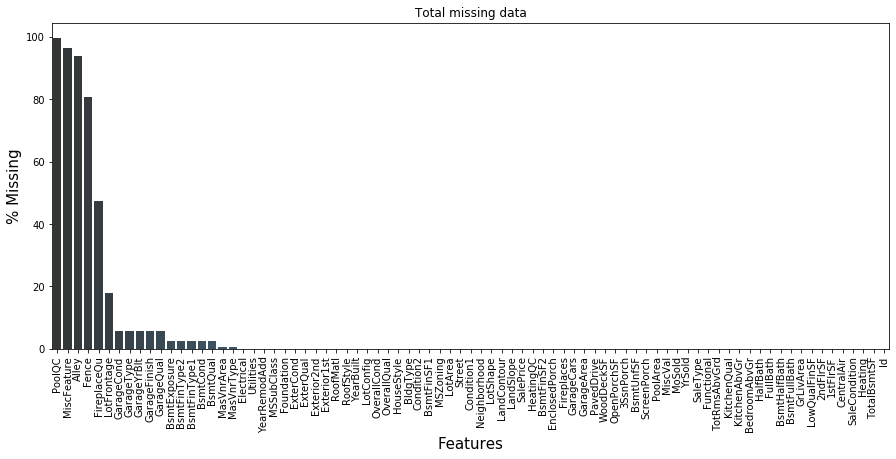

In [7]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x=total_missing.index,y=total_missing['% Missing'],palette='Blues_d')
plt.xlabel('Features',fontsize=15)
plt.ylabel('% Missing',fontsize=15)
plt.title("Total missing data")

- <h2> Conclusion: Features such as PoolQC, MiscFeature,Alley,Fence, and FireplaceQU have 50% or more than 50% of their data missing.
      Therefore, they can be dropped.
 </h2>

In [8]:
house_df = house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [9]:
house_df.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageCond        81
GarageQual        81
                ... 
CentralAir         0
HeatingQC          0
SaleCondition      0
TotalBsmtSF        0
MSSubClass         0
Length: 75, dtype: int64

In [10]:
house_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Text(0.5, 1.0, 'LotFrontage Boxplot')

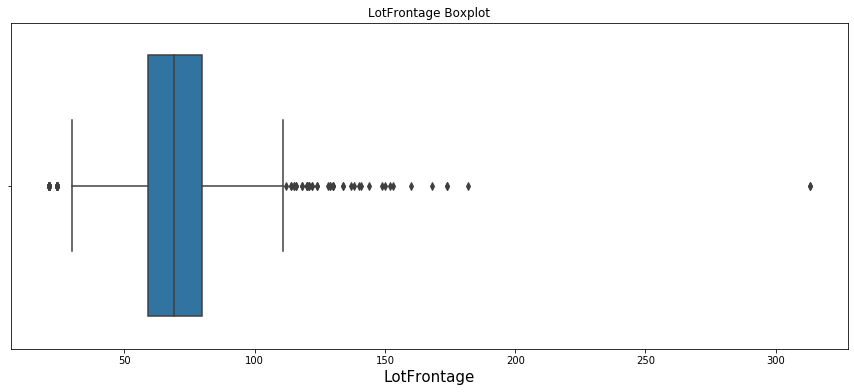

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(x='LotFrontage',data=house_df)
plt.xlabel('LotFrontage',fontsize=15)
plt.title('LotFrontage Boxplot')

In [12]:
house_df['LotFrontage'] = house_df['LotFrontage'].fillna('median')

<h3> The other missing columns such as:<br>
    <li>GarageFinish, GarageType, GarageYrBlt, GarageCond, and GarageQual</li>
    <li>BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtCond,and BsmtQual</li>
    are all related to two categories, Garage and Basement. Therefore, let us identify if the data is Missing at Random(MAR) or 
    whether all the rows related to each entity mentioned above are missing together.
</h3>

In [13]:
garage_info = ['GarageFinish','GarageType','GarageYrBlt','GarageCond','GarageQual','GarageArea']
for garage in garage_info:
    print("{}:{}\nTotal missing:\n{}\nCategories Split:\n{}\n".format(garage,house_df[garage].unique(),house_df[garage].isnull().sum(),house_df[garage].value_counts()))

GarageFinish:['RFn' 'Unf' 'Fin' nan]
Total missing:
81
Categories Split:
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

GarageType:['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Total missing:
81
Categories Split:
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

GarageYrBlt:[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Total missing:
81


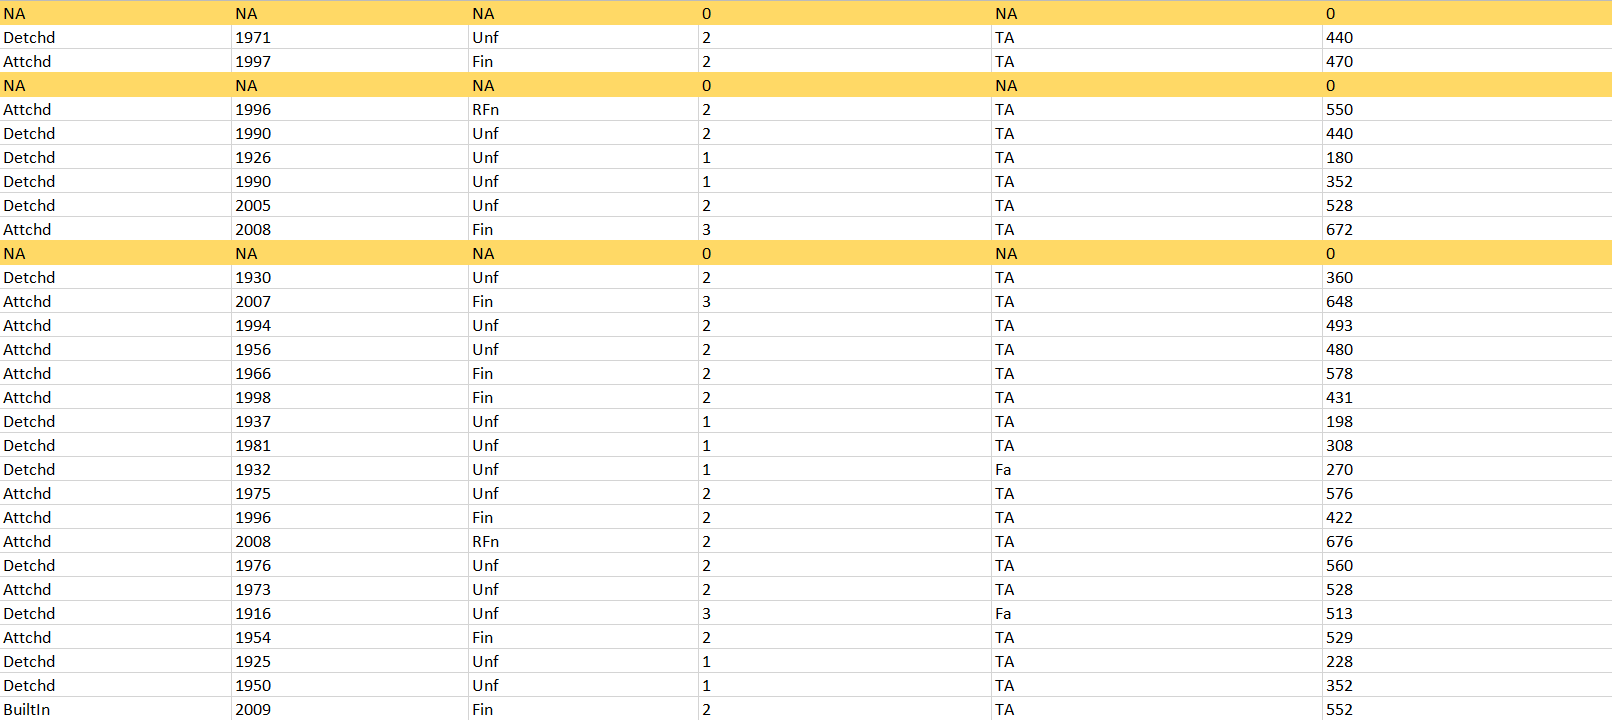

### The image inserted above contains information regarding all the Garage columns. It was found that houses without a garage were filled with NA, which is reflected here as missing. Therefore, instead of removing the data, these categorical values can be replaced with 'Missing'###

In [14]:
garage_info = ['GarageFinish','GarageType','GarageCond','GarageQual']
for garage in garage_info:
    house_df[garage] = house_df[garage].fillna('Missing') 
    print("{}:{}\nTotal missing:\n{}\nCategories Split:\n{}\n".format(garage,house_df[garage].unique(),house_df[garage].isnull().sum(),house_df[garage].value_counts()))

GarageFinish:['RFn' 'Unf' 'Fin' 'Missing']
Total missing:
0
Categories Split:
Unf        605
RFn        422
Fin        352
Missing     81
Name: GarageFinish, dtype: int64

GarageType:['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Missing' 'Basment' '2Types']
Total missing:
0
Categories Split:
Attchd     870
Detchd     387
BuiltIn     88
Missing     81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

GarageCond:['TA' 'Fa' 'Missing' 'Gd' 'Po' 'Ex']
Total missing:
0
Categories Split:
TA         1326
Missing      81
Fa           35
Gd            9
Po            7
Ex            2
Name: GarageCond, dtype: int64

GarageQual:['TA' 'Fa' 'Gd' 'Missing' 'Ex' 'Po']
Total missing:
0
Categories Split:
TA         1311
Missing      81
Fa           48
Gd           14
Po            3
Ex            3
Name: GarageQual, dtype: int64



In [15]:
house_df['GarageYrBlt'].isnull().sum()

81

In [16]:
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)

In [17]:
house_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,    0., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [18]:
garage = house_df[['GarageType','GarageYrBlt','SalePrice','GarageArea','GarageFinish','GarageQual']]

In [19]:
heatmap_data = pd.pivot_table(garage,values='SalePrice',index=['GarageType'],columns='GarageYrBlt')

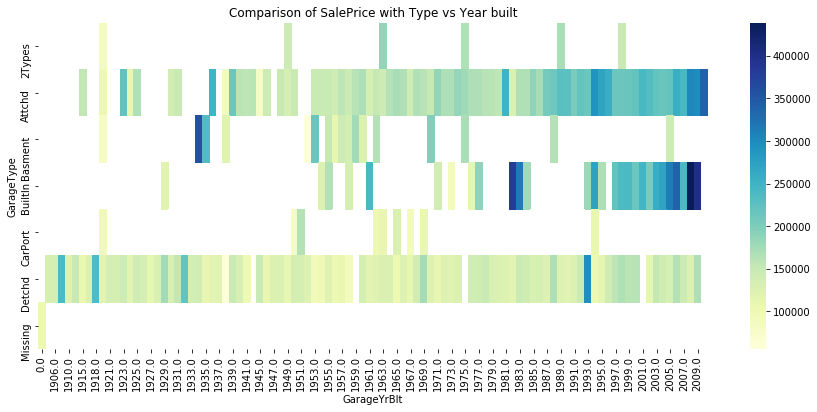

In [20]:
plt.figure(figsize=(15,6))
plt.title("Comparison of SalePrice with Type vs Year built",fontsize=12)
sns.heatmap(heatmap_data, cmap="YlGnBu")

### The following can be inferred and concluded from the above heatmap:
- Garages that are more recently built make the property costlier.
- There isn't a big difference in price for properties where the garage has been detached.
- It will be interesting to compare the size of garages which are attached, built-in and detached to see whether the increase in price is justified over time over whether there is an inverse relationship between size and year. 

In [21]:
heatmap_data = pd.pivot_table(garage,values='GarageArea',index=['GarageType'],columns='GarageYrBlt')

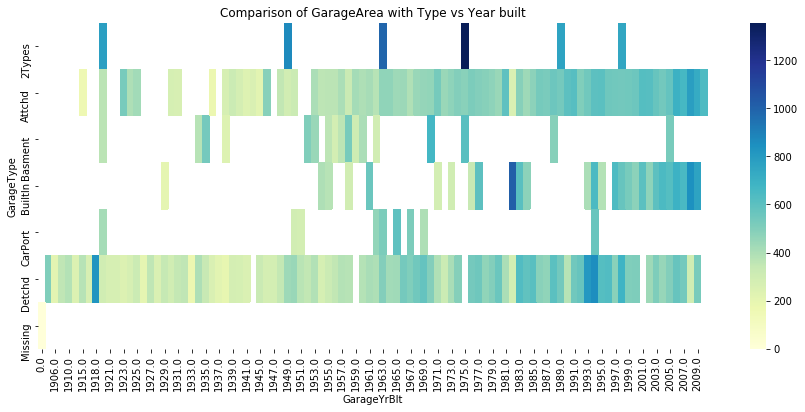

In [22]:
plt.figure(figsize=(15,6))
plt.title("Comparison of GarageArea with Type vs Year built",fontsize=12)
sns.heatmap(heatmap_data,cmap="YlGnBu")

### The following can be inferred and concluded from the above heatmap:
- Size of garages has increased over time.
- For type: '2types', the size has always been on the higher side while price of the property has been surprisingly remained cheap.  
- For detached garages, even with an increase in size of garage, the price has remained more or less constant.
- For Built-in and Attached garages, the increase in size is tantamount to the increase in SalePrice. 

### Let us check if GarageArea and GarageCars are correlated. It is expected that if Area is more, then the cars owned might also be higher. A scatterplot can confirm this hypothesis.


Text(0.5, 1.0, 'Cars vs Area')

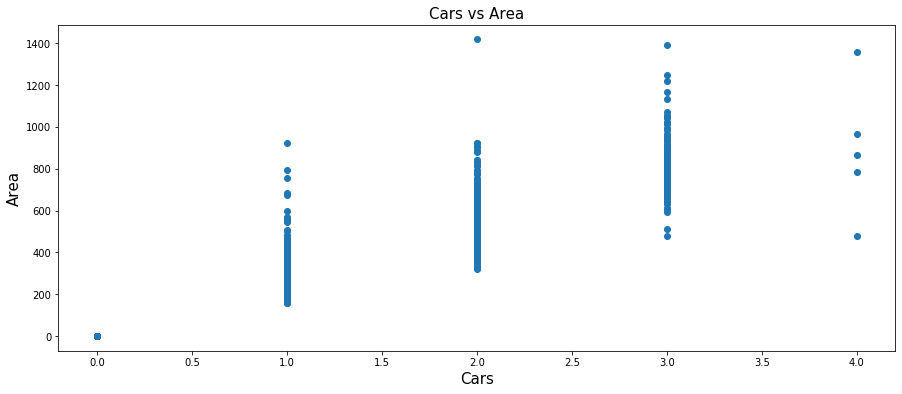

In [23]:
plt.figure(figsize=(15,6))
plt.xlabel("Cars",fontsize=15)
plt.ylabel("Area",fontsize=15)
plt.scatter(house_df.GarageCars,house_df.GarageArea)
plt.title("Cars vs Area",fontsize=15)

- The suggested trend is not completely accurate as areas with 1000 sq. ft or more have 1 or 2 cars while areas with 500 sq.ft have 4 cars.
- However, barring the anomalies, the increase in number of cars with the increase in area does indicate that the trend is observed on most occasions.

Text(0.5, 1.0, 'Quality vs Finish')

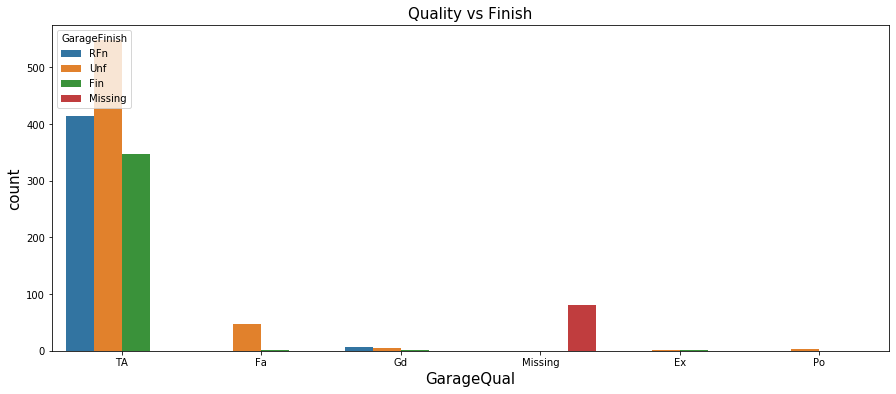

In [24]:
plt.figure(figsize=(15,6))
plt.xlabel("GarageQual",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(x='GarageQual',hue='GarageFinish',data=house_df)
plt.title("Quality vs Finish",fontsize=15)

In [25]:
house_df.isnull().sum().sort_values(ascending=False).head(10)

BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
ExterQual        0
RoofMatl         0
dtype: int64

### Similar to the garage scenario, basements which are absent are labelled as missing. These values can be replaced with a 'missing' label.

In [26]:
bsmt = house_df[['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']]

In [27]:
bsmt = bsmt.fillna('Missing')

In [28]:
i=0
for col in bsmt.columns:
    house_df[col] = bsmt.iloc[:,i]
    i+=1

In [29]:
house_df = house_df.dropna() 

In [30]:
house_df.isnull().sum().sort_values(ascending=False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
MSSubClass      0
Length: 75, dtype: int64

### Given that all the missing data have been removed, there is still some cleaning to do. Let us explore the data further.

In [31]:
house_object = house_df.select_dtypes(include='object')

In [32]:
for col in house_object.columns:
    print("Column:\t{}\nUnique values:\t{}".format(col,len(house_df[col].unique())))

Column:	MSZoning
Unique values:	5
Column:	LotFrontage
Unique values:	111
Column:	Street
Unique values:	2
Column:	LotShape
Unique values:	4
Column:	LandContour
Unique values:	4
Column:	Utilities
Unique values:	2
Column:	LotConfig
Unique values:	5
Column:	LandSlope
Unique values:	3
Column:	Neighborhood
Unique values:	25
Column:	Condition1
Unique values:	9
Column:	Condition2
Unique values:	8
Column:	BldgType
Unique values:	5
Column:	HouseStyle
Unique values:	8
Column:	RoofStyle
Unique values:	6
Column:	RoofMatl
Unique values:	8
Column:	Exterior1st
Unique values:	15
Column:	Exterior2nd
Unique values:	16
Column:	MasVnrType
Unique values:	4
Column:	ExterQual
Unique values:	4
Column:	ExterCond
Unique values:	5
Column:	Foundation
Unique values:	6
Column:	BsmtQual
Unique values:	5
Column:	BsmtCond
Unique values:	5
Column:	BsmtExposure
Unique values:	5
Column:	BsmtFinType1
Unique values:	7
Column:	BsmtFinType2
Unique values:	7
Column:	Heating
Unique values:	6
Column:	HeatingQC
Unique values:	5
C

### Let us pick those columns whose unique values<=6

In [33]:
for col in [col for col in house_object.columns if len(house_object[col].unique())<=6]:
    print("Column:\t{}\nUnique:\t{}\nDistribution of values:\n{}\n".format(col,house_object[col].unique(),house_object[col].value_counts()))

Column:	MSZoning
Unique:	['RL' 'RM' 'C (all)' 'FV' 'RH']
Distribution of values:
RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Column:	Street
Unique:	['Pave' 'Grvl']
Distribution of values:
Pave    1445
Grvl       6
Name: Street, dtype: int64

Column:	LotShape
Unique:	['Reg' 'IR1' 'IR2' 'IR3']
Distribution of values:
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64

Column:	LandContour
Unique:	['Lvl' 'Bnk' 'Low' 'HLS']
Distribution of values:
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Column:	Utilities
Unique:	['AllPub' 'NoSeWa']
Distribution of values:
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

Column:	LotConfig
Unique:	['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Distribution of values:
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Column:	LandSlope
Unique:	['Gtl' 'Mod' 'Sev']
Dist

<h3>Columns mentioned below are all unevenly distributed<br>
<li> Street 
<li> MSZoning
<li> LandContour
<li> Utilities
<li> LandSlope
<li> LotConfig
<li> BldgType
<li> Heating
<li> CentralAir
<li> Electrical
<li> PavedDrive
<li> RoofStyle
<li> SaleCondition</li>
Some of these can be dropped. Let us see if they influence the target or not.</h3>

In [34]:
cols = ['Street','MSZoning','LandContour','Utilities','LandSlope','LotConfig','BldgType','Heating','CentralAir','Electrical','PavedDrive','RoofStyle','SaleCondition']

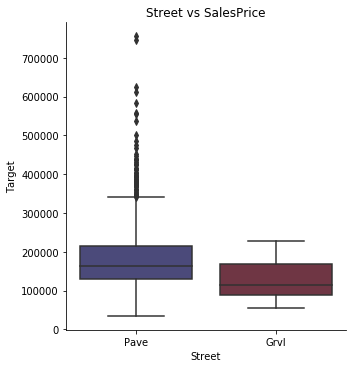

In [35]:
sns.catplot(x=cols[0],y='SalePrice',data=house_df,kind='box',order=house_df[cols[0]].value_counts().index,palette='icefire')
plt.xlabel(cols[0])
plt.ylabel("Target") 
plt.title("{} vs SalesPrice".format(cols[0]))
plt.show()

- ### Although the street can play an important factor, since there are only 6 Gravel roads, this column can be dropped.

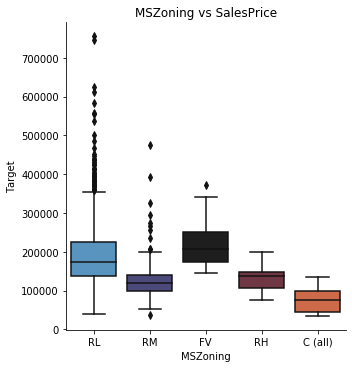

In [36]:
sns.catplot(x=cols[1],y='SalePrice',data=house_df,kind='box',order=house_df[cols[1]].value_counts().index,palette='icefire')
plt.xlabel(cols[1])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[1]))
plt.show()

- ### The kind of zone a house is located in can play a vital role in determining its cost. But considering the distribution, the importance of this feature can be examined after performing ANOVA.

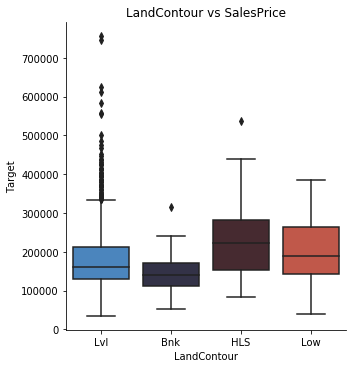

In [37]:
sns.catplot(x=cols[2],y='SalePrice',data=house_df,kind='box',order=house_df[cols[2]].value_counts().index,palette='icefire')
plt.xlabel(cols[2])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[2]))
plt.show()

- ### LandContour and LandSlope are dependent on each other as the  flatness of the property influences the slope. Therefore one of them can be dropped and the other feature's importance can be examined with ANOVA.

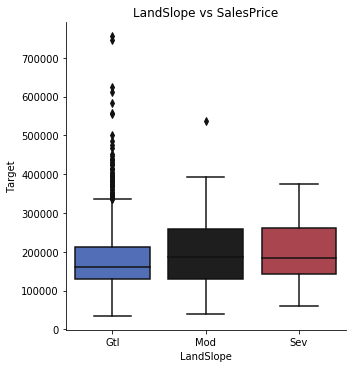

In [38]:
sns.catplot(x=cols[4],y='SalePrice',data=house_df,kind='box',order=house_df[cols[4]].value_counts().index,palette='icefire')
plt.xlabel(cols[4])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[4]))
plt.show()

- ### The terrain can influence the price of a property.However,the split-up is highly in favour of Gentle slope and can hence be dropped.

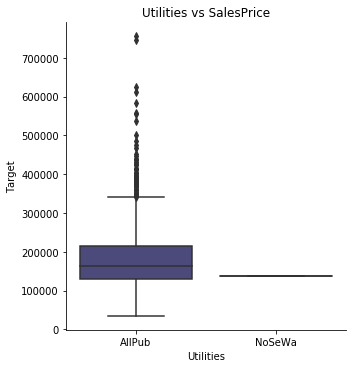

In [39]:
sns.catplot(x=cols[3],y='SalePrice',data=house_df,kind='box',order=house_df[cols[3]].value_counts().index,palette='icefire')
plt.xlabel(cols[3])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[3]))
plt.show()

- ### Utilities such as Electricity,Water,Gas,and Septic Tank are vital factors to consider.However, since all properties except 1 have all the utilities, it can be dropped.  

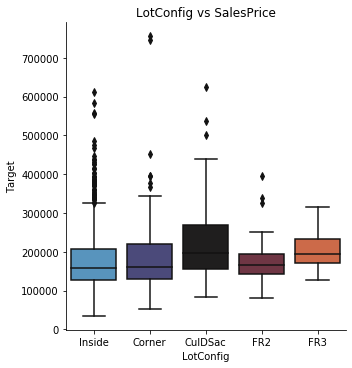

In [40]:
sns.catplot(x=cols[5],y='SalePrice',data=house_df,kind='box',order=house_df[cols[5]].value_counts().index,palette='icefire')
plt.xlabel(cols[5])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[5]))
plt.show()

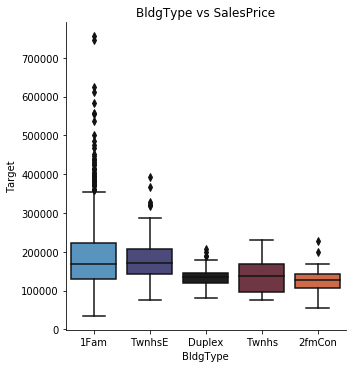

In [41]:
sns.catplot(x=cols[6],y='SalePrice',data=house_df,kind='box',order=house_df[cols[6]].value_counts().index,palette='icefire')
plt.xlabel(cols[6])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[6]))
plt.show()

- ### The type of building should definitely influence the cost. Let us retain this column to perform ANOVA and confirm.

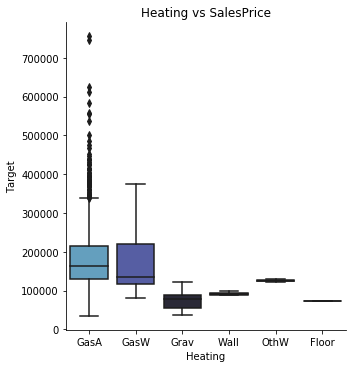

In [42]:
sns.catplot(x=cols[7],y='SalePrice',data=house_df,kind='box',order=house_df[cols[7]].value_counts().index,palette='icefire')
plt.xlabel(cols[7])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[7]))
plt.show()

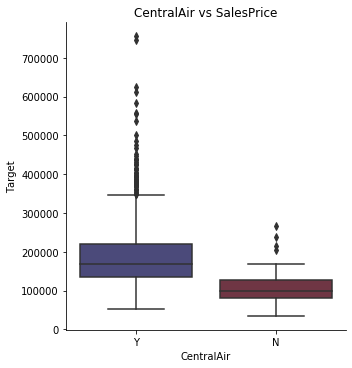

In [43]:
sns.catplot(x=cols[8],y='SalePrice',data=house_df,kind='box',order=house_df[cols[8]].value_counts().index,palette='icefire')
plt.xlabel(cols[8])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[8]))
plt.show()

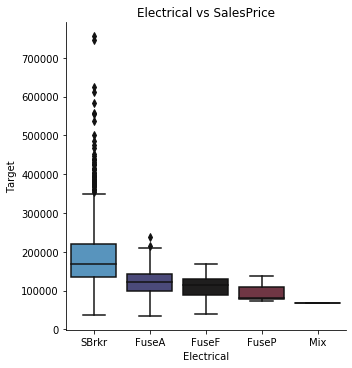

In [44]:
sns.catplot(x=cols[9],y='SalePrice',data=house_df,kind='box',order=house_df[cols[9]].value_counts().index,palette='icefire')
plt.xlabel(cols[9])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[9]))
plt.show()

- ### Electrical work is important for the working of different appliants but this feature can be dropped as it isn't vital for determining the price of a property.

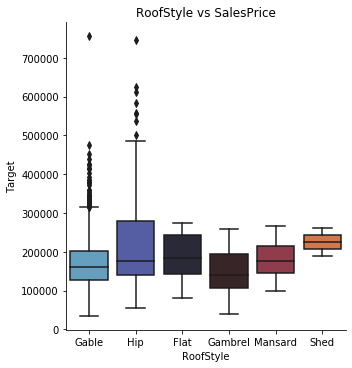

In [45]:
sns.catplot(x=cols[11],y='SalePrice',data=house_df,kind='box',order=house_df[cols[11]].value_counts().index,palette='icefire')
plt.xlabel(cols[11])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[11]))
plt.show()

- ### Roofstyle may impact the price but it seems like a minor feature. It can be verified in the coming parts.

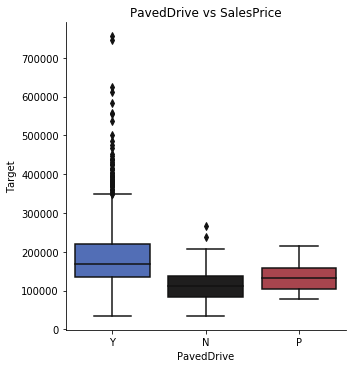

In [46]:
sns.catplot(x=cols[10],y='SalePrice',data=house_df,kind='box',order=house_df[cols[10]].value_counts().index,palette='icefire')
plt.xlabel(cols[10])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[10]))
plt.show()

- ### Like Roofstyle, PavedDrive seems like a minor feature influencing the sale price.  

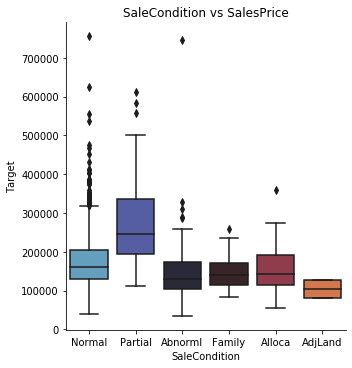

In [47]:
sns.catplot(x=cols[12],y='SalePrice',data=house_df,kind='box',order=house_df[cols[12]].value_counts().index,palette='icefire')
plt.xlabel(cols[12])
plt.ylabel("Target")           
plt.title("{} vs SalesPrice".format(cols[12]))
plt.show()

- ### Sale condition is one of the most important factors which decides the price of a property. It is of no surprise that the majority of the properties are normal and hence this feature should be retained.

### Proceeding to perform ANOVA for two reasons:
- To indentify those categorical variables which influence the SalePrice greatly, and
- To confirm some of the conclusions mentioned above.

In [48]:
from scipy import stats

In [49]:
house_objects = house_df.select_dtypes(exclude=[np.number])

In [50]:
cat_columns = [col for col in house_df.columns if col in house_df.select_dtypes(include='object')]

In [51]:
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat_columns
    pvals = []
    for c in cat_columns:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [52]:
house_objects['SalePrice'] = house_df.SalePrice.values

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
k = anova(house_objects) 
k['disparity'] = np.log(1./k['pval'].values) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

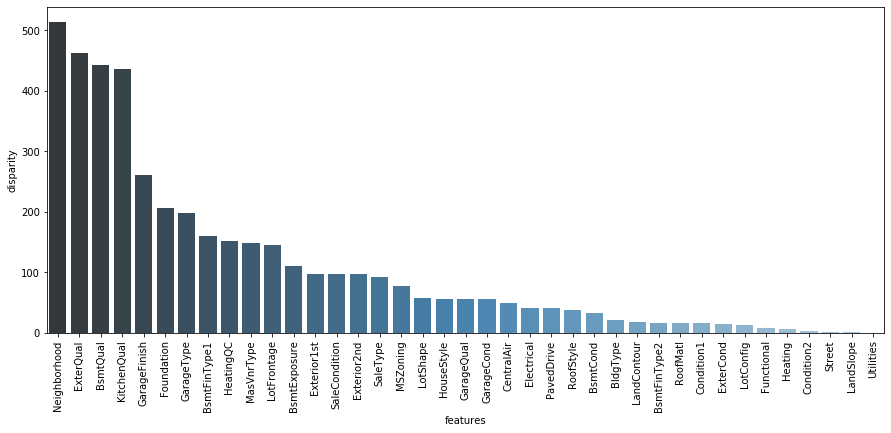

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'features', y='disparity',data=k,palette='Blues_d') 
plt.xticks(rotation=90) 

- ### From the graph it is evident that columns following MSZoning are not that important and can hence be dropped.
- ### On the contrary, columns such as Neighbourhood, ExterQual,... till MSZoning are all vital features influencing the price.  

In [55]:
house_df = house_df.drop(['Utilities','Street','Heating','Electrical','LandSlope','ExterCond','RoofStyle','LotConfig','LandContour','PavedDrive','BldgType','BsmtCond','BsmtFinType2','RoofMatl','Condition1','LotFrontage','MasVnrType','BsmtQual'],axis=1)

In [56]:
house_df.shape

(1451, 57)

In [57]:
cat = [col for col in house_df.columns if house_df.dtypes[col]=='object']

In [58]:
cat

['MSZoning',
 'LotShape',
 'Neighborhood',
 'Condition2',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SaleCondition']

- ### Certain columns such as GarageType, GarageFinish, GarageQual, GarageCond, BsmtExposure, BsmtFinType1 can be dropped.

In [59]:
house_df = house_df.drop(['GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType1','HouseStyle','Condition2','Functional'],axis=1)

### Considering the numerical features, let's examine the correlation values using a heatmap.

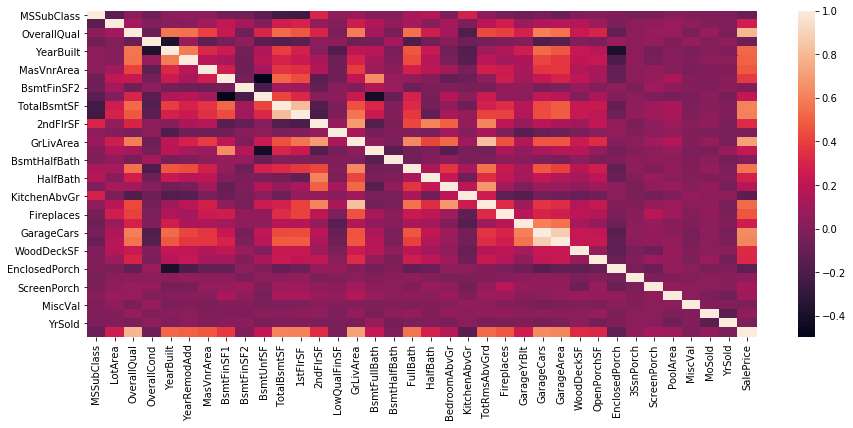

In [60]:
plt.figure(figsize=(15,6))
sns.heatmap(house_df.corr(method='pearson'))

In [61]:
house_df.corr(method="pearson")['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790085
GrLivArea        0.710073
GarageCars       0.639749
GarageArea       0.622484
TotalBsmtSF      0.613299
1stFlrSF         0.606969
FullBath         0.562710
TotRmsAbvGrd     0.536366
YearBuilt        0.523274
YearRemodAdd     0.507488
MasVnrArea       0.477486
Fireplaces       0.468973
BsmtFinSF1       0.383995
WoodDeckSF       0.324658
2ndFlrSF         0.322840
OpenPorchSF      0.311244
HalfBath         0.282331
LotArea          0.264668
GarageYrBlt      0.261558
BsmtFullBath     0.224988
BsmtUnfSF        0.215707
BedroomAbvGr     0.171956
ScreenPorch      0.113017
PoolArea         0.093102
3SsnPorch        0.045235
MoSold           0.045085
BsmtFinSF2      -0.010350
BsmtHalfBath    -0.016021
MiscVal         -0.020961
LowQualFinSF    -0.025277
YrSold          -0.026165
OverallCond     -0.076361
MSSubClass      -0.082760
EnclosedPorch   -0.128826
KitchenAbvGr    -0.137447
Name: SalePrice, dtype: float64

### Columns whose correlation values are <=0.4 can be dropped as their influence is very negligible.

In [62]:
house_df = house_df.drop(['GarageYrBlt','HalfBath','OpenPorchSF','2ndFlrSF','WoodDeckSF','BsmtFinSF1','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','3SsnPorch','MoSold','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr'],axis=1)

In [63]:
house_df.shape

(1451, 26)

In [64]:
cat = [col for col in house_df.columns if house_df.dtypes[col]=='object']
print(cat)

['MSZoning', 'LotShape', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'HeatingQC', 'CentralAir', 'KitchenQual', 'SaleType', 'SaleCondition']


## Performing encoding to convert the categorical data into it's numerical form.
### Ordinal features:
1. Kitchen Quality
2. External Quality
3. Heating Quality

### Nominal features:
1. MSZoning
2. LotShape
3. Neighborhood
4. Exterior1st
5. Exterior2nd
6. Foundation
7. Central Air
8. Sale Type
9. Sale Condition


 

In [65]:
ordinal_cols = ["KitchenQual",'ExterQual','HeatingQC']
for col in ordinal_cols:
    house_df[col] = house_df[col].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}) 

- ### Before encoding the nominal categories, let us see the count of unique values in each category.

In [66]:
nominal_cols = ['MSZoning','LotShape','Neighborhood','Exterior1st','Exterior2nd','Foundation','CentralAir','SaleType','SaleCondition']
for col in nominal_cols:
    print("Column:{}\nDistribution:\n{}\n".format(col,house_df[col].value_counts()))

Column:MSZoning
Distribution:
RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Column:LotShape
Distribution:
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64

Column:Neighborhood
Distribution:
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Crawfor     50
Mitchel     49
NoRidge     41
Timber      37
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Column:Exterior1st
Distribution:
VinylSd    509
HdBoard    222
MetalSd    220
Wd Sdng    205
Plywood    108
CemntBd     59
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

Column:Exterior2nd
Dis

### For columns such as Neighborhood,Exterior1,and Exterior2, since there are many unique values, let us compare the SalePrice and see if a few columns can be combined. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

<Figure size 1080x1008 with 0 Axes>

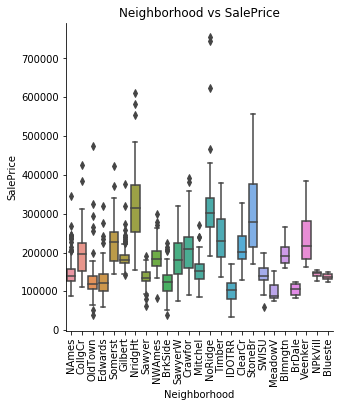

In [67]:
plt.figure(figsize=(15,14))
sns.catplot(x='Neighborhood',y='SalePrice',data=house_df,kind='box',order=house_df['Neighborhood'].value_counts().index)
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.title("Neighborhood vs SalePrice")
plt.xticks(rotation=90)

### Comparing the following neighborhoods to see if it's feasible to merge them into the same category to reduce dimensions:
- Oldtown,Edwards,Sawyer,NPKVill,Blueste,Brkside - <b>location1</b>
- Gilbert,NWAmes,SawyerW,Blmngtn - <b>location2</b>
- NridgeHT,NoRidge - <b>location3</b>


### Making the comparison wrt the following factors:
1. ExterQual
2. BsmtQual
3. KitchenQual
4. OverallQual
5. GrLivArea
6. GarageCars
7. GarageArea

In [68]:
location1 = house_df[(house_df['Neighborhood']=="OldTown")|(house_df['Neighborhood']=="Edwards")|(house_df['Neighborhood']=="Sawyer")|(house_df['Neighborhood']=="NPkVill")|(house_df['Neighborhood']=="Blueste")|(house_df['Neighborhood']=="BrkSide")]

In [69]:
location1['Neighborhood'].unique()

array(['OldTown', 'BrkSide', 'Sawyer', 'Edwards', 'NPkVill', 'Blueste'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1080x432 with 0 Axes>

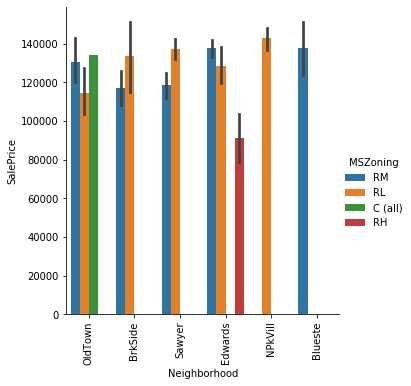

In [70]:
plt.figure(figsize=(15,6))
sns.catplot(x='Neighborhood',y='SalePrice',hue='MSZoning',data=location1,kind='bar')
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)

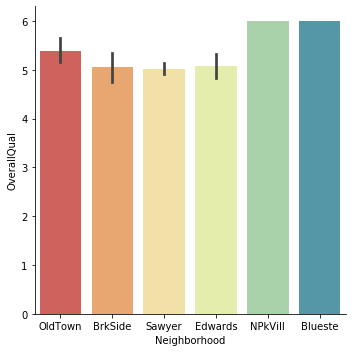

In [71]:
sns.catplot(x='Neighborhood',y='OverallQual',kind='bar',data=location1,palette='Spectral')

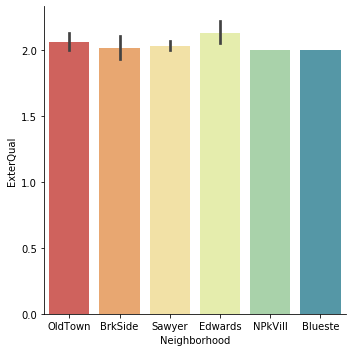

In [72]:
sns.catplot(x='Neighborhood',y='ExterQual',kind='bar',data=location1,palette='Spectral')

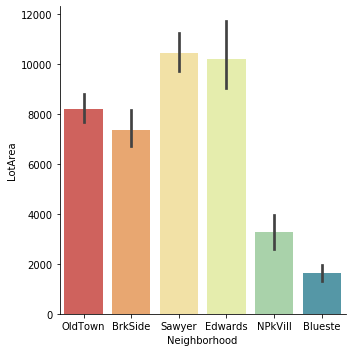

In [73]:
sns.catplot(x='Neighborhood',y='LotArea',kind='bar',data=location1,palette='Spectral')

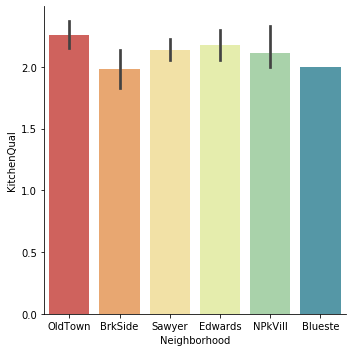

In [74]:
sns.catplot(x="Neighborhood",y='KitchenQual',kind='bar',data=location1,palette='Spectral')

- ### On comparing these neighborhoods, it can be seen that Sawyer and Edwards are very similar and can be combined.
- ### Repeating this process for other columns that can be potentially combined.

In [75]:
location2 = house_df[(house_df['Neighborhood']=='Gilbert')|(house_df['Neighborhood']=="NWAmes")|(house_df['Neighborhood']=="SawyerW")|(house_df['Neighborhood']=="Blmngtn")]

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 1080x432 with 0 Axes>

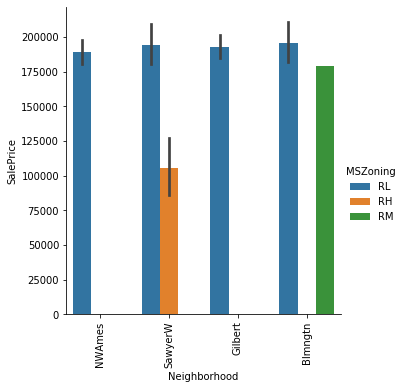

In [76]:
plt.figure(figsize=(15,6))
sns.catplot(x='Neighborhood',y='SalePrice',hue='MSZoning',data=location2,kind='bar')
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)

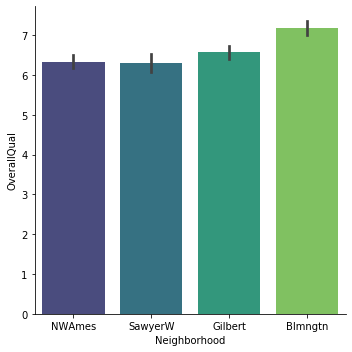

In [77]:
sns.catplot(x='Neighborhood',y='OverallQual',kind='bar',data=location2,palette='viridis')

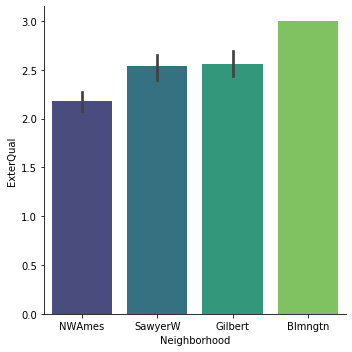

In [78]:
sns.catplot(x='Neighborhood',y='ExterQual',kind='bar',data=location2,palette='viridis')

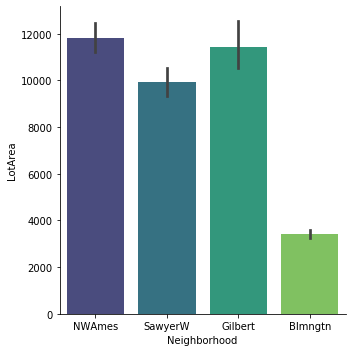

In [79]:
sns.catplot(x='Neighborhood',y='LotArea',kind='bar',data=location2,palette='viridis')

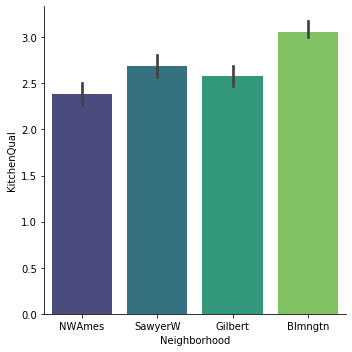

In [80]:
sns.catplot(x="Neighborhood",y='KitchenQual',kind='bar',data=location2,palette='viridis')

- ### NWAmes,Gilbert,and SawyerW are very similar in characteristics and can therefore be considered together

In [81]:
location3 = house_df[(house_df['Neighborhood']=="NridgHt")|(house_df['Neighborhood']=="NoRidge")]

(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 1080x432 with 0 Axes>

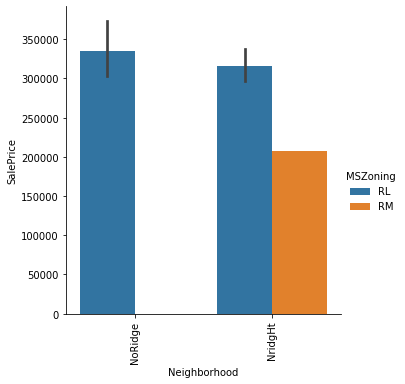

In [82]:
plt.figure(figsize=(15,6))
sns.catplot(x='Neighborhood',y='SalePrice',hue='MSZoning',data=location3,kind='bar')
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)

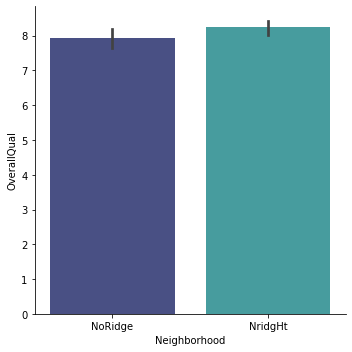

In [83]:
sns.catplot(x='Neighborhood',y='OverallQual',kind='bar',data=location3,palette='mako')

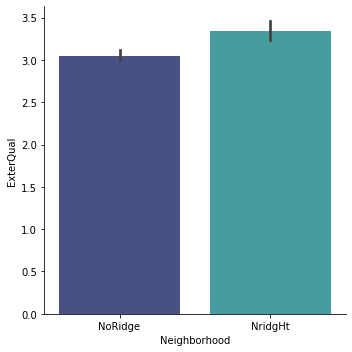

In [84]:
sns.catplot(x='Neighborhood',y='ExterQual',kind='bar',data=location3,palette='mako')

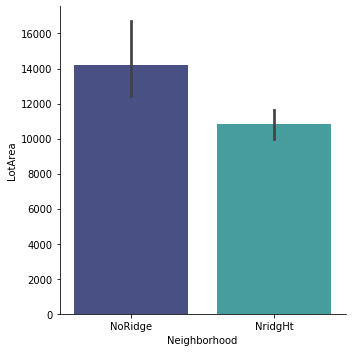

In [85]:
sns.catplot(x='Neighborhood',y='LotArea',kind='bar',data=location3,palette='mako')

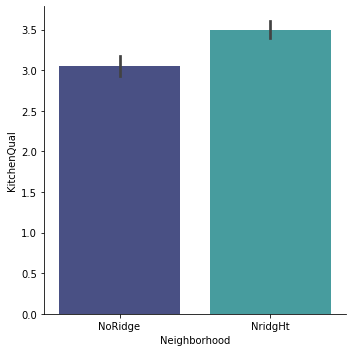

In [86]:
sns.catplot(x="Neighborhood",y='KitchenQual',kind='bar',data=location3,palette='mako')

In [87]:
house_df['Neighborhood'] = house_df['Neighborhood'].replace({'Edwards':'location1','Sawyer':'location1','Gilbert':'location2','NWAmes':'location2','SawyerW':'location2','NridgeHT':'location3','NoRidge':'location3'})

### Checking Exterior1st and Exterior2nd to reduce dimensions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

<Figure size 1080x432 with 0 Axes>

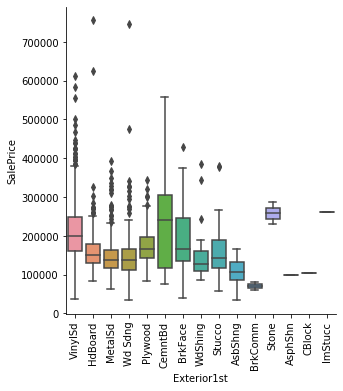

In [88]:
plt.figure(figsize=(15,6))
sns.catplot(x='Exterior1st',y='SalePrice',data=house_df,kind='box',order=house_df['Exterior1st'].value_counts().index)
plt.xlabel("Exterior1st")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)

- ### Some external values such as HdBoard, MetalSD, Wd Sdng, WdShing, AsbShng, CBlock,and AsphShn have the same median price values. These columns can be combined as others.This helps in dimensionality reduction.
- ### In continuation, Plywood and BrkFace have same median and can be combined as others2

In [89]:
house_df['Exterior1st'] = house_df['Exterior1st'].replace({'HdBoard':'others1','MetalSD':'others1','Wd Sdng':'others1','WdShing':'others1','AsbShng':'others1','CBlock':'others1','AsphShn':'others1','Plywood':'others2','BrkFace':'others2'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

<Figure size 1080x432 with 0 Axes>

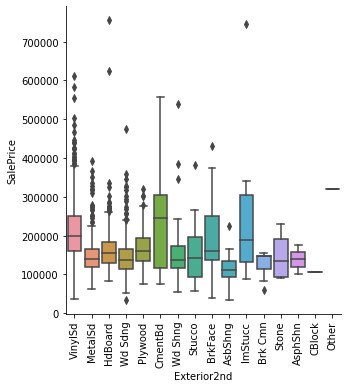

In [90]:
plt.figure(figsize=(15,6))
sns.catplot(x='Exterior2nd',y='SalePrice',data=house_df,kind='box',order=house_df['Exterior2nd'].value_counts().index)
plt.xlabel("Exterior2nd")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)

In [91]:
house_df['Exterior2nd'] = house_df['Exterior2nd'].replace({'HdBoard':'others1','MetalSD':'others1','Wd Sdng':'others1','WdShing':'others1','AsbShng':'others1','CBlock':'others1','AsphShn':'others1','Stucco':'others1',
                                                           'Plywood':'others2','BrkFace':'others2'})

### Encoding categorical variables

In [92]:
house_df = pd.get_dummies(data=house_df,columns=nominal_cols)

In [93]:
house_df = house_df.drop(['Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other'],axis=1)

In [94]:
print(house_df['SalePrice'].describe())
print("Range:",max(house_df['SalePrice'])-min(house_df['SalePrice']))

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Range: 720100


### Splitting the dataset into training and validation sets

In [95]:
X = house_df.drop('SalePrice',axis=1)
Y = house_df['SalePrice']

In [96]:
from sklearn.model_selection import train_test_split as tts

In [97]:
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.3,random_state=0)

In [98]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1015, 86) (436, 86) (1015,) (436,)


## Building a random forest regressor 

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rf_regressor = RandomForestRegressor(n_estimators = 20,max_depth = 10,min_samples_split = 2,min_samples_leaf = 2)

In [101]:
rf_regressor.fit(X_train,Y_train)
Y_pred = rf_regressor.predict(X_test)

### Measuring RMSE and R2 score for random forest regressor

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
rmse_rf = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2_rf = r2_score(Y_test,Y_pred)

In [110]:
print("RMSE Error:{}\nR2 Score:{}".format(rmse_rf,r2_rf))

RMSE Error:28556.520554239156
R2 Score:0.8642459985658982


### Performing 10 fold cross validation for random forest regressor

In [111]:
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator = rf_regressor, X = X_train, y = Y_train, cv=10)
print("Accuracy = {:.2f}%".format(accuracies.mean()*100))

Accuracy = 82.66%


### Performing Hyperparameter tuning to improve the model. This is implemented using:
- #### Random search cross validation 

In [112]:
print("Paramters are: {}".format(rf_regressor.get_params()))

Paramters are: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [115]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [116]:
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf_regressor, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=10,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=20, n_jobs=None,
                   

In [117]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 37,
 'bootstrap': False}

In [124]:
rf_regressor_randomcv = RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=37,bootstrap='False')

In [125]:
rf_regressor_randomcv.fit(X_train,Y_train)

RandomForestRegressor(bootstrap='False', ccp_alpha=0.0, criterion='mse',
                      max_depth=37, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [126]:
Y_pred_randomcv = rf_regressor_randomcv.predict(X_test)

In [127]:
rmse_randomcv = np.sqrt(mean_squared_error(Y_test,Y_pred_randomcv))
r2_randomcv = r2_score(Y_test,Y_pred_randomcv)

In [128]:
print("RMSE Error:{}\nR2 Score:{}".format(rmse_randomcv,r2_randomcv))

RMSE Error:26649.6091783859
R2 Score:0.8817710729769752


In [177]:
from sklearn.model_selection import cross_val_score as cvs

In [176]:
accuracies = cvs(estimator = rf_regressor_randomcv, X = X_train, y = Y_train, cv=10)
print("Accuracy = {:.2f}%".format(accuracies.mean()*100))

Accuracy = 84.26%


### Building a XGBoost Regressor

In [130]:
import xgboost as xgb

In [131]:
xgb_regressor = xgb.XGBRegressor(n_estimators=10)

In [132]:
xgb_regressor.fit(X_train,Y_train)
Y_pred_xgb = xgb_regressor.predict(X_test)

### Measuring the rmse and r2 score

In [133]:
rmse_xgb = np.sqrt(mean_squared_error(Y_test,Y_pred_xgb))
r2_xgb = r2_score(Y_test,Y_pred_xgb)

In [135]:
print("RMSE Error:{}\nR2 Score:{}".format(rmse_xgb,r2_xgb))

RMSE Error:30107.010166590524
R2 Score:0.8491041423374797


### Performing 10 fold cross validation for XGBoost regressor

In [137]:
accuracies_xgb = cvs(estimator = xgb_regressor, X = X_train, y = Y_train, cv=10)
print("Accuracy = {:.2f}%".format(accuracies_xgb.mean()*100))

Accuracy = 79.33%


### Performing hyperparameter tuning for xgb_regressor

In [138]:
print("XGB Regressor parameters are:\n{}".format(xgb_regressor.get_params()))

XGB Regressor parameters are:
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 10, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [141]:
# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
max_depth.append(None)
# Learning rate
lr = [float(x) for x in np.linspace(start = 0.01, stop = 0.1, num = 5)]
# Minimum weight of child
min_samples_weight = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]
# Random state
rand_state = [0,1,42]
# Number of jobs
jobs = [int(x) for x in np.linspace(start = 0, stop = 200, num = 10)]

In [143]:
# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': lr,
               'min_samples_weight': min_samples_weight,
               'random_state': rand_state,
               'n_jobs': jobs}
print(random_grid_xgb)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_depth': [1, 25, 50, 75, 100, None], 'learning_rate': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'min_samples_weight': [1, 23, 45, 67, 89, 111, 133, 155, 177, 200], 'random_state': [0, 1, 42], 'n_jobs': [0, 22, 44, 66, 88, 111, 133, 155, 177, 200]}


In [144]:
# Use the random grid to search for best hyperparameters
xgb_random = RandomizedSearchCV(estimator = xgb_regressor, param_distributions = random_grid_xgb, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_train,Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 41.7min finished


[18:23:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=10,...
                   param_distributions={'learning_rate': [0.01, 0.0325,
                                                          0.05500000000000001,
                                       

In [145]:
xgb_random.best_params_

{'random_state': 1,
 'n_jobs': 22,
 'n_estimators': 157,
 'min_samples_weight': 1,
 'max_depth': None,
 'learning_rate': 0.05500000000000001}

In [146]:
xgb_regressor_randomcv = xgb.XGBRegressor(n_estimators=157,n_jobs=22,min_samples_weight=1,max_depth=None,learning_rate=0.05500000000000001,random_state=1)

In [147]:
xgb_regressor_randomcv.fit(X_train,Y_train)

[18:29:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05500000000000001, max_delta_step=0, max_depth=6,
             min_child_weight=1, min_samples_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=157, n_jobs=22,
             num_parallel_tree=1, objective='reg:squarederror', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
Y_pred_xgb_randomcv = xgb_regressor_randomcv.predict(X_test)

In [149]:
rmse_xgb_randomcv = np.sqrt(mean_squared_error(Y_test,Y_pred_xgb_randomcv))
r2_xgb_randomcv = r2_score(Y_test,Y_pred_xgb_randomcv)

In [150]:
print("RMSE Error:{}\nR2 Score:{}".format(rmse_xgb_randomcv,r2_xgb_randomcv))

RMSE Error:27279.86945062563
R2 Score:0.8761127437400209


In [151]:
accuracies_xgb_tuning = cvs(estimator = xgb_regressor_randomcv, X = X_train, y = Y_train, cv=10)
print("Accuracy = {:.2f}%".format(accuracies_xgb_tuning.mean()*100))

[18:29:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_weight } might not be used.

  This may not be accurate due to some parameters a

### Building a AdaBoost Regressor

In [152]:
from sklearn.ensemble import AdaBoostRegressor

In [153]:
adb_regressor = AdaBoostRegressor(n_estimators=10)

In [154]:
adb_regressor.fit(X_train,Y_train)
Y_pred_adb = adb_regressor.predict(X_test)

In [155]:
rmse_adb = np.sqrt(mean_squared_error(Y_test,Y_pred_adb))
r2_adb = r2_score(Y_test,Y_pred_adb)

In [156]:
print("RMSE error: {}\nR2 score: {}\n".format(rmse_adb,r2_adb))

RMSE error: 34200.84260373049
R2 score: 0.805277708754379



### Performing 10 fold cross validation

In [157]:
accuracies_adb = cvs(estimator = adb_regressor, X = X_train, y = Y_train, cv=10)
print("Accuracy = {:.2f}%".format(accuracies_adb.mean()*100))

Accuracy = 74.01%


### Performing hyperparameter tuning

In [158]:
print("AdaBoostRegressor parameters are:\n{}".format(adb_regressor.get_params()))

AdaBoostRegressor parameters are:
{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 10, 'random_state': None}


In [159]:
# Number of trees in AdaBoost
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Learning rate
lr = [float(x) for x in np.linspace(start = 0.01, stop = 0.1, num = 5)]
# Random state
rand_state = [0,1,42]
rand_state.append(None)
# Loss
loss = ['linear','square','exponential']

In [160]:
# Create the random grid
random_grid_adb = {'n_estimators': n_estimators,
               'learning_rate': lr,
               'random_state': rand_state,
               'loss':loss}
print(random_grid_adb)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'learning_rate': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'random_state': [0, 1, 42, None], 'loss': ['linear', 'square', 'exponential']}


In [161]:
# Use the random grid to search for best hyperparameters
adb_random = RandomizedSearchCV(estimator = adb_regressor, param_distributions = random_grid_adb, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
adb_random.fit(X_train,Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=10,
                                               random_state=None),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.0325,
                                                          0.05500000000000001,
                                                          0.0775, 0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200],
                                        'ra

In [162]:
adb_random.best_params_

{'random_state': 42,
 'n_estimators': 200,
 'loss': 'exponential',
 'learning_rate': 0.1}

In [170]:
adb_regressor_randomcv = AdaBoostRegressor(n_estimators=200,learning_rate=0.1,random_state=42,loss='exponential')

In [171]:
adb_regressor_randomcv.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='exponential',
                  n_estimators=200, random_state=42)

In [172]:
Y_pred_adb_randomcv = adb_regressor_randomcv.predict(X_test)

In [173]:
rmse_adb_randomcv = np.sqrt(mean_squared_error(Y_test,Y_pred_adb_randomcv))
r2_adb_randomcv = r2_score(Y_test,Y_pred_adb_randomcv)

In [174]:
print("RMSE Error:{}\nR2 Score:{}".format(rmse_adb_randomcv,r2_adb_randomcv))

RMSE Error:34113.089337040525
R2 Score:0.8062756722016595


In [175]:
accuracies_adb_tuning = cvs(estimator = adb_regressor_randomcv, X = X_train, y = Y_train, cv=10)
print("Accuracy = {:.2f}%".format(accuracies_adb_tuning.mean()*100))

Accuracy = 78.45%


In [178]:
print("Out of the three models trained here are the accuracies, RMSE, and R2 scores post tuning\n")
print("Random forest regressor:\nAccuracy: {}\nRMSE: {}\nR2 Score: {}\n".format(accuracies.mean()*100,rmse_randomcv,r2_randomcv))
print("Xtreme Gradient regressor:\nAccuracy: {}\nRMSE: {}\nR2 Score: {}\n".format(accuracies_xgb_tuning.mean()*100,rmse_xgb_randomcv,r2_xgb_randomcv))
print("AdaBoost regressor:\nAccuracy: {}\nRMSE: {}\nR2 Score: {}\n".format(accuracies_adb_tuning.mean()*100,rmse_adb_randomcv,r2_adb_randomcv))

Out of the three models trained here are the accuracies, RMSE, and R2 scores post tuning

Random forest regressor:
Accuracy: 84.25906825886325
RMSE: 26649.6091783859
R2 Score: 0.8817710729769752

Xtreme Gradient regressor:
Accuracy: 82.73321075005923
RMSE: 27279.86945062563
R2 Score: 0.8761127437400209

AdaBoost regressor:
Accuracy: 78.45321042629843
RMSE: 34113.089337040525
R2 Score: 0.8062756722016595



### Loading the test set and measuring the accuracy

In [124]:
test_data = pd.read_csv("test.csv")

In [125]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [126]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Dropping unnecessary columns and performing cleaning

In [127]:
test_data = test_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [128]:
test_data = test_data.drop(['GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType1','HouseStyle','Condition2','Functional'],axis=1)

In [129]:
test_data = test_data.drop(['GarageYrBlt','HalfBath','OpenPorchSF','2ndFlrSF','WoodDeckSF','BsmtFinSF1','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','3SsnPorch','MoSold','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr'],axis=1)

In [130]:
test_data = test_data.drop(['Utilities','Street','Heating','Electrical','LandSlope','ExterCond','RoofStyle','LotConfig','LandContour','PavedDrive','BldgType','BsmtCond','BsmtFinType2','RoofMatl','Condition1','LotFrontage','MasVnrType','BsmtQual'],axis=1)

In [131]:
ordinal_cols = ["KitchenQual",'ExterQual','HeatingQC']
for col in ordinal_cols:
    test_data[col] = test_data[col].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [132]:
test_data['Neighborhood'] = test_data['Neighborhood'].replace({'Edwards':'location1','Sawyer':'location1','Gilbert':'location2','NWAmes':'location2','SawyerW':'location2','NridgeHT':'location3','NoRidge':'location3'})

In [133]:
test_data['Exterior1st'] = test_data['Exterior1st'].replace({'HdBoard':'others1','MetalSD':'others1','Wd Sdng':'others1','WdShing':'others1','AsbShng':'others1','CBlock':'others1','AsphShn':'others1','Plywood':'others2','BrkFace':'others2'})

In [134]:
test_data['Exterior2nd'] = test_data['Exterior2nd'].replace({'HdBoard':'others1','MetalSD':'others1','Wd Sdng':'others1','WdShing':'others1','AsbShng':'others1','CBlock':'others1','AsphShn':'others1','Stucco':'others1',
                                                           'Plywood':'others2','BrkFace':'others2'})

In [135]:
for col in nominal_cols:
    print("Column:{}\nDistribution:\n{}\n".format(col,test_data[col].value_counts()))

Column:MSZoning
Distribution:
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Column:LotShape
Distribution:
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

Column:Neighborhood
Distribution:
NAmes        218
location2    210
location1    171
OldTown      126
CollgCr      117
Somerst       96
NridgHt       89
Mitchel       65
IDOTRR        56
Crawfor       52
BrkSide       50
Timber        34
location3     30
StoneBr       26
SWISU         23
MeadowV       20
ClearCr       16
BrDale        14
NPkVill       14
Veenker       13
Blmngtn       11
Blueste        8
Name: Neighborhood, dtype: int64

Column:Exterior1st
Distribution:
VinylSd    510
others1    481
MetalSd    230
others2    150
CemntBd     65
Stucco      18
BrkComm      4
Name: Exterior1st, dtype: int64

Column:Exterior2nd
Distribution:
VinylSd    510
others1    435
MetalSd    233
others2    150
CmentBd     66
Wd Shng     43
Brk Cmn     15
ImStu

In [136]:
    test_data = pd.get_dummies(data=test_data,columns=nominal_cols)

In [137]:
test_data

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,11622,5,1961,1961,0.0,2,882.0,2,896,896,...,0,0,0,1,0,0,0,0,1,0
1,14267,6,1958,1958,108.0,2,1329.0,2,1329,1329,...,0,0,0,1,0,0,0,0,1,0
2,13830,5,1997,1998,0.0,2,928.0,3,928,1629,...,0,0,0,1,0,0,0,0,1,0
3,9978,6,1998,1998,20.0,2,926.0,4,926,1604,...,0,0,0,1,0,0,0,0,1,0
4,5005,8,1992,1992,0.0,3,1280.0,4,1280,1280,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1970,1970,0.0,2,546.0,3,546,1092,...,0,0,0,1,0,0,0,0,1,0
1455,1894,4,1970,1970,0.0,2,546.0,2,546,1092,...,0,0,0,1,1,0,0,0,0,0
1456,20000,5,1960,1996,0.0,2,1224.0,4,1224,1224,...,0,0,0,1,1,0,0,0,0,0
1457,10441,5,1992,1992,0.0,2,912.0,2,970,970,...,0,0,0,1,0,0,0,0,1,0


In [138]:
test_data.isnull().sum().sort_values(ascending=False).head(10)

MasVnrArea              15
KitchenQual              1
TotalBsmtSF              1
GarageArea               1
GarageCars               1
Neighborhood_IDOTRR      0
Neighborhood_Blmngtn     0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
dtype: int64

In [139]:
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].median())
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(3)
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].median())

In [140]:
test_data

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,11622,5,1961,1961,0.0,2,882.0,2,896,896,...,0,0,0,1,0,0,0,0,1,0
1,14267,6,1958,1958,108.0,2,1329.0,2,1329,1329,...,0,0,0,1,0,0,0,0,1,0
2,13830,5,1997,1998,0.0,2,928.0,3,928,1629,...,0,0,0,1,0,0,0,0,1,0
3,9978,6,1998,1998,20.0,2,926.0,4,926,1604,...,0,0,0,1,0,0,0,0,1,0
4,5005,8,1992,1992,0.0,3,1280.0,4,1280,1280,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1970,1970,0.0,2,546.0,3,546,1092,...,0,0,0,1,0,0,0,0,1,0
1455,1894,4,1970,1970,0.0,2,546.0,2,546,1092,...,0,0,0,1,1,0,0,0,0,0
1456,20000,5,1960,1996,0.0,2,1224.0,4,1224,1224,...,0,0,0,1,1,0,0,0,0,0
1457,10441,5,1992,1992,0.0,2,912.0,2,970,970,...,0,0,0,1,0,0,0,0,1,0


In [141]:
test_data = test_data.dropna()

In [142]:
cols = test_data.columns
cols_train = X_train.columns

In [143]:
missing = []
for col in cols_train:
    if col not in cols:
        missing.append(col)

In [144]:
missing

[]

In [145]:
Y_pred_test_randomcv = rf_regressor_randomcv.predict(test_data)

In [146]:
print("Predicted Price for test set:\n{}".format(Y_pred_test_randomcv))

Predicted Price for test set:
[125684.56279365 152590.73360714 176783.10393795 ... 154065.56176587
 131651.89163781 213195.68043759]
